In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Sales prediction model

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Read data

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/Advertising.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## visualization

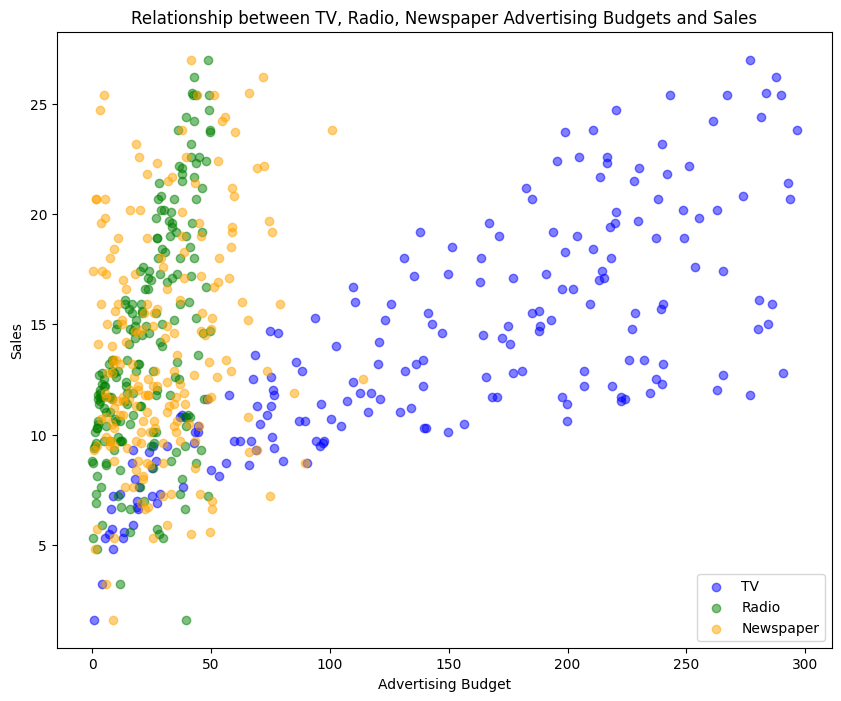

In [6]:
# Plotting the relationship between 'TV' and 'Sales'
plt.figure(figsize=(10, 8))

# Scatter plot with 'TV' and 'Sales'
plt.scatter(df['TV'], df['Sales'], color='blue', label='TV', alpha=0.5)

# Scatter plot with 'Radio' and 'Sales'
plt.scatter(df['Radio'], df['Sales'], color='green', label='Radio', alpha=0.5)

# Scatter plot with 'Newspaper' and 'Sales'
plt.scatter(df['Newspaper'], df['Sales'], color='orange', label='Newspaper', alpha=0.5)

plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.title('Relationship between TV, Radio, Newspaper Advertising Budgets and Sales')
plt.legend()
plt.show()

## Linear regression model

In [7]:
# Creating a linear regression model
model = LinearRegression()

In [8]:
# Features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']   # Target variable

In [9]:
# Training the model
model.fit(X, y)

LinearRegression()

In [10]:
# Making predictions on the training data
y_pred_train = model.predict(X)

# Calculate R-squared value
r2 = r2_score(y, y_pred_train)
print("R-squared:", r2)

R-squared: 0.8972106381789522


## Random Forest Regression model

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Data preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Creating a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [14]:
# Training the model
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Making predictions on the testing data
y_pred_test = model.predict(X_test_scaled)

In [16]:
# Calculate R-squared value
r2 = r2_score(y_test, y_pred_test)
print("R-squared:", r2)

R-squared: 0.9812750924472915
